## Loading the tidyverse Library and reading the raw data from Git Hub.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(themis)
library(parsnip)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [4]:
players <- read_csv("https://raw.githubusercontent.com/Snowy129/DSCI100-Project/refs/heads/main/players.csv")
head(players)

sessions <- read_csv("https://raw.githubusercontent.com/Snowy129/DSCI100-Project/refs/heads/main/sessions.csv")
head(sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [5]:
clean_players1 <- players |>
    mutate(gender = as_factor(gender), age = as.integer(age), experience = as_factor(experience)) |>
    select(played_hours, gender, age, experience, subscribe) |>
    filter(age >= 17)
head(clean_players1)

played_hours,gender,age,experience,subscribe
<dbl>,<fct>,<int>,<fct>,<lgl>
3.8,Male,17,Veteran,TRUE
0.0,Male,17,Veteran,FALSE
0.7,Female,21,Amateur,TRUE
0.1,Male,21,Regular,TRUE
0.0,Female,17,Amateur,TRUE
0.0,Female,19,Regular,TRUE


## Linear Regression to predict play time based on the age and whether or not the player is subscribed to the game

In [6]:
#Linear Regression Wrangling
clean_players_with_outliers <- players |>
    mutate(age = as.integer(age), subscribe = as.numeric(subscribe)) |>
    select(played_hours,age, subscribe) |>
    arrange(-played_hours)
head(clean_players_with_outliers)

#Cutting off outliers of played_hours
cutoff_high = quantile(clean_players_with_outliers, probs = 0.975, na.rm = TRUE)
cutoff_high

clean_players <- clean_players_with_outliers |>
    filter(age >= 17) |>
    filter(played_hours < cutoff_high) |>
    filter(played_hours != 0) |>
    arrange(-played_hours)
clean_players


played_hours,age,subscribe
<dbl>,<int>,<dbl>
223.1,17,1
218.1,20,1
178.2,19,1
150.0,16,1
56.1,23,1
53.9,17,1


97.5% 
 39.3

played_hours,age,subscribe
<dbl>,<int>,<dbl>
32.0,22,1
23.7,24,1
18.5,49,1
⋮,⋮,⋮
0.1,17,1
0.1,18,0
0.1,44,1


In [7]:
knn_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

knn_recipe <- recipe(played_hours ~ age + subscribe, data = clean_players)

lm_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = clean_players)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age    subscribe  
    0.56610      0.02149      0.90817  


In [8]:
lm_test_results <- lm_fit |>
    predict(clean_players) |>
    bind_cols(clean_players) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse") |>
    pull(.estimate)

lm_test_results

[1] 4.582584

## Subscribe Only Linear Regression

In [9]:
knn_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

knn_recipe_2 <- recipe(played_hours ~ subscribe, data = clean_players)

lm_fit_2 <- workflow() |>
    add_recipe(knn_recipe_2) |>
    add_model(knn_spec) |>
    fit(data = clean_players)
lm_fit_2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)    subscribe  
     1.0440       0.9357  


In [10]:
lm_test_results_subscribe <- lm_fit_2 |>
    predict(clean_players) |>
    bind_cols(clean_players) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse") |>
    pull(.estimate)

lm_test_results_subscribe

[1] 4.59013

## Age Linear Regression Only

In [11]:
knn_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

knn_recipe_3 <- recipe(played_hours ~ age, data = clean_players)

lm_fit_3 <- workflow() |>
    add_recipe(knn_recipe_3) |>
    add_model(knn_spec) |>
    fit(data = clean_players)
lm_fit_3

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
      1.198        0.023  


In [12]:
lm_test_results_age <- lm_fit_3 |>
    predict(clean_players) |>
    bind_cols(clean_players) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse") |>
    pull(.estimate)

lm_test_results_age

[1] 4.600081

Cell Below Was used to create the quantile

In [13]:
# Sample data
set.seed(123)
data <- data.frame(value = rnorm(100))

# Calculate the 97.5th percentile
cutoff <- quantile(data$value, 0.975)

# Filter out the top 2.5%
filtered_data <- data[data$value <= cutoff, ]

# Print the filtered data
print(filtered_data)


 [1] -0.560475647 -0.230177489  1.558708314  0.070508391  0.129287735
 [6]  1.715064987  0.460916206 -1.265061235 -0.686852852 -0.445661970
[11]  1.224081797  0.359813827  0.400771451  0.110682716 -0.555841135
[16]  1.786913137  0.497850478 -1.966617157  0.701355902 -0.472791408
[21] -1.067823706 -0.217974915 -1.026004448 -0.728891229 -0.625039268
[26] -1.686693311  0.837787044  0.153373118 -1.138136937  1.253814921
[31]  0.426464221 -0.295071483  0.895125661  0.878133488  0.821581082
[36]  0.688640254  0.553917654 -0.061911711 -0.305962664 -0.380471001
[41] -0.694706979 -0.207917278 -1.265396352  1.207961998 -1.123108583
[46] -0.402884835 -0.466655354  0.779965118 -0.083369066  0.253318514
[51] -0.028546755 -0.042870457  1.368602284 -0.225770986  1.516470604
[56] -1.548752804  0.584613750  0.123854244  0.215941569  0.379639483
[61] -0.502323453 -0.333207384 -1.018575383 -1.071791226  0.303528641
[66]  0.448209779  0.053004227  0.922267468 -0.491031166 -2.309168876
[71]  1.005738524 -0

In [ ]:
** Graph of played hours versus age

Warning message in geom_point(aplha = 0.25):
“Ignoring unknown parameters: `aplha`”


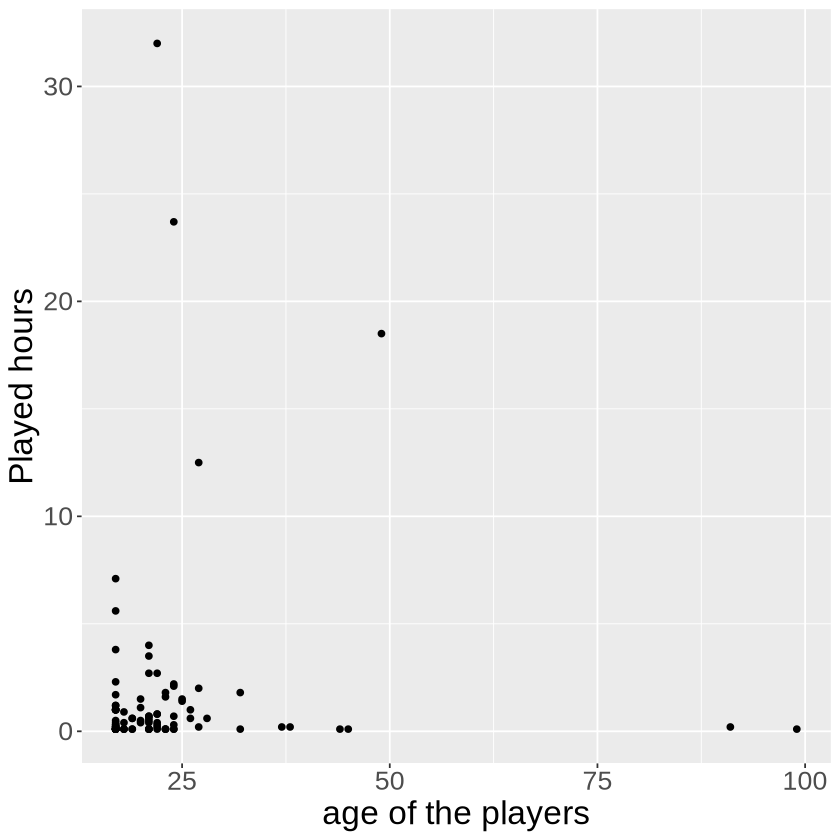

In [14]:
#Played hours versus age scatter plot
graph_age<-clean_players|>
ggplot(aes(x=age, y=played_hours))+
       geom_point(aplha=0.25)+
       xlab("age of the players")+
       ylab("Played hours")+
       theme(text = element_text(size = 20))
graph_age
       

In [ ]:
** graph of played hours versus subscription

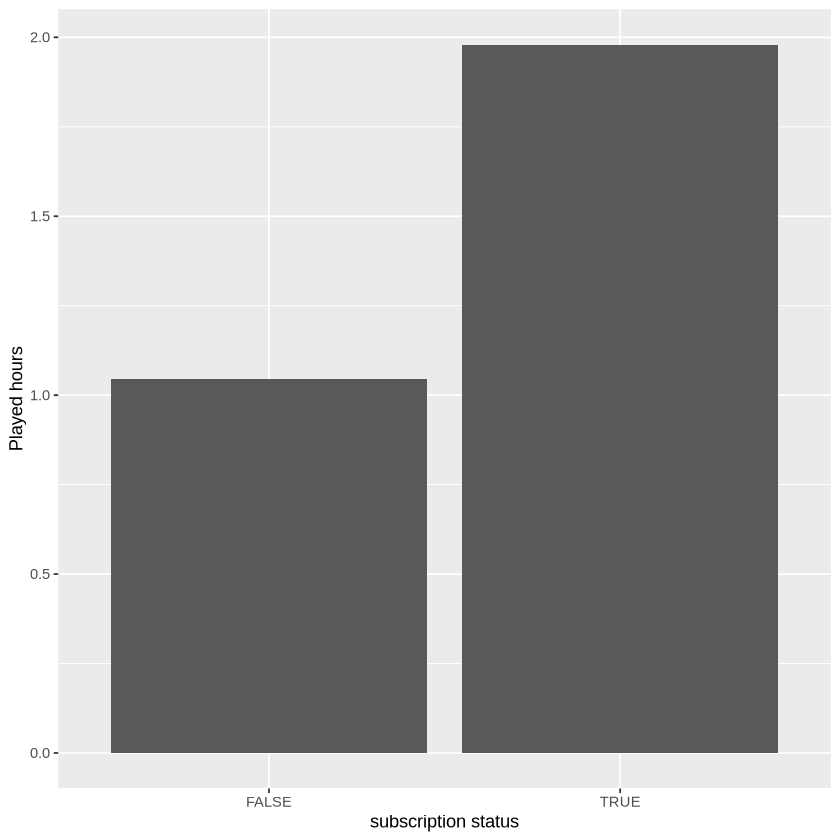

In [21]:
#Played hours versus subscription satus bar plot
clean_players_new<-clean_players|>
mutate(subscribe=as.logical(subscribe))|>
group_by(subscribe)|>
summarize(average=mean(played_hours))
graph_subscription<-clean_players_new|>
ggplot(aes(x=subscribe, y=average))+
       geom_bar(stat="identity")+
       xlab("subscription status")+
       ylab("Played hours")
     
graph_subscription

## Project Report :  Predicting the hours played by players of different ages and subscription status using linear regression.

* ## Introduction:
There is a game running on a server called Minecraft. The server records players' actions as they navigate through the game. These recorded actions are stored in two datasets, which we named “players” and “sessions.”
Our goal is to determine whether younger and subscribed players contribute more time to playing the game. We hypothesized that they do, assuming younger players have more free time and greater interest in video games, enabling them to accumulate more played hours and provide significant data for our research. We expected playtime to decrease with age and increase with a subscription. For this analysis, we used the “players” dataset, which contained the necessary columns: age, subscribe, and played hours.

* ## Summary of the “Players” Data Set

Rows: 196
Columns: 9

* Row Descriptions:
* Experience
     * Chr
     * The self reported experience level of each player
     * Should be represented as a factor. Is also self reported with no clear definitions of each category, making the data unreliable
* Subscribe
     * Lgl
     * Describes whether or not the player wis subscribed to PlaiCraft
     * Unclear column name creates confusion
* hashedEmail
     * Chr
     * Unique encrypted code representing the players email. Encrypted to preserve privacy
     * Unreadable at first glance, need to use computation to use or compare values
* Played_hours
     * Dbl
     * the amount of time each player spent on the server
     * Only records to the first decimal point, creates a lack of specificity as the exact amount of time on the server is not recorder, e.g. to the second or the minute
* Name
     * Chr
     * first name of the player
     * Self reported with the possibility for typos
* Gender
     * Chr
     * The self reported gender of each player
     * Some values missing as players preferred not to say. Also, would be better represented as a factor
* Age
     * Dbl
     * Age of each player in years
     * Would be better represented as an integer. Seems to include some unlikely values (e.g. age 9) that creates uncertainty in data reliability
* individualID
     * Lgl
     * indicates whether or not the player has an individual ID
     * Column name is not descriptive, and is NA for all players in this set, making it unusable
* organizationName
     * Lgl
     * indicates whether or not the player has an organizational name                
     * Column name is not descriptive, and is NA for all players in this set, making it unusable


* ## Methods & Results:

We initially made two graphs: One scatter plot to indicate the relationship between “played hours” and “age” and a bar plot demonstrating the relationship between “played hours” and “subscription status” of the players. Although the played hours versus age scatter plot indicated that there was not a clear relationship between played hours and age, we still used age as a predictor because there was a higher density of points for younger players. Additionally, we found the average hours played by subscribed and unsubscribed players. Then, we made a bar plot to determine the relationship between the “average played hours” and “subscription status” of the players. Based on the bar plot, subscribed players have allocated around two hours to the game compared to the unsubscribed players, who played around one hour in average.  

  We attempted to use knn regression, but we faced an error while centering and scaling our predictors, and we failed to fix it. So, we switched to linear regression, which was not the best approach to answer our proposed question. The first issue we faced using the linear regression was the outliers in the data. Thus, we had to remove them by filtering out observations of high-played hours and the players younger than 17 years old.  However, we still got some convincing results with low RMSPE values. We tested our linear regression with subscribe as the only predictor, age as the only predictor, and subscribe and age as our predictors.  In all predictions, we got a RMSPE value of around 4.6. We also found that the variable “subscribe”(slope= 0.9357) has a higher impact on the “played hours” compared to “age”(slope= 0.023), after running the linear regression. 

In this analysis, we explored the relationships between played hours, age, and subscription status. Our scatter plot showed no clear correlation between played hours and age, though younger players exhibited higher density, leading us to include age as a predictor. A bar plot revealed that subscribed players averaged approximately 2 hours of gameplay, double that of unsubscribed players.
Our initial attempt to use KNN regression failed due to an error during scaling and centering the data, so we shifted to linear regression. Despite its limitations for this task, linear regression provided consistent results. Outliers were addressed by filtering players under 17 years old and those with extremely high played hours. We tested models with subscribe as the only predictor, age as the only predictor, and both predictors together, all yielding a similar RMSPE of ~4.6. This consistency suggests that subscribe and age contribute independently but weakly to predicting played hours.
Notably, subscription status (slope = 0.9357) had a much stronger impact on played hours compared to age (slope = 0.023). These findings indicate that while age plays a minor role, subscription status is the primary determinant of gameplay duration.

* ## Some further discussions we had:

We have found that using age and subscribe is not very effective at predicting the hours a player plays. This was not what we expected to find, and our hypothesis turned out to be false. We attempted to predict played hours with both age and subscribe, as well as each variable individually, however, we were unable to reduce the RMSE to a satisfactory level; all models had almost identical RMSE values. All models had an RMSE of roughly 4.6, indicating that the average error between the accurate played hours and the predicted played hours was 4.6 hours. The fact that the RMSE did not change substantially between models indicates that our predictor variables were not very effective. In our testing we found that the subscribe column had a much stronger weight in the equation. Here are the line of best fit equation values we found:

* Age and Subscribe Regression:
* Age Slope: 0.02149
* Subscribe Slope: 0.90817
* Intercept: 0.56610
* RMSE: 4.5825


* Subscribe Only Regression:
* Subscribe Slope: 0.9357
* Intercept: 1.0440
* RMSE: 4.5901

* Age Only Regression:
* Age Slope: 0.023
* Intercept: 1.198
* RMSE: 4.600

These findings, despite our hypothesis being incorrect, are still helpful for our research. Now, when creating future models we know that using age and subscribe will not be helpful in finding players that will contribute a lot of data. 

Further questions that could be derived from this research can be more exploratory. Now that we know age and subscribe are not good predictors of played hours, what are good predictors? Perhaps experience level may predict played hours better, as more experienced players will play more. Or one could evaluate questions regarding gender. Are men more likely to play more hours, as video games are often marketed towards them?
